This dataset consists of 2,400 RNA sequences, each with associated secondary structure and predicted loop types. Every sequence length is identical (107 nucleotides), enabling uniform comparisons. The predominant loop types, such as ‘S’ and ‘E’, occur tens of thousands of times, shaping the structural complexity. From a graph perspective—where nucleotides are nodes and base pairs form edges—the average graph contains about 24 edges and exhibits a typically low average node degree, often under 1. Overall, the dataset’s graphs show relatively sparse connectivity and distinct distributions of loop types that influence topological features like degree distributions and edge counts.

---

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Increase plot resolution
%matplotlib inline
plt.rcParams['figure.dpi'] = 120

TRAIN_JSON = "stanford-covid-vaccine/train.json"

# Load data
data = []
with open(TRAIN_JSON, 'r') as f:
    for line in f:
        item = json.loads(line.strip())
        data.append(item)

df = pd.DataFrame(data)
df.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1.0,107,68,"[0.1359, 0.207, 0.1633, 0.1452, 0.1314, 0.105,...","[0.2613, 0.3842, 0.1372, 0.2531, 0.1798, 0.137...","[0.2631, 0.286, 0.0964, 0.1574, 0.1, 0.1019, 0...","[0.1501, 0.275, 0.0947, 0.1866, 0.1369, 0.1148...","[0.2167, 0.3475, 0.188, 0.2124, 0.1703, 0.1481...","[0.3297, 1.5693, 1.1227, 0.8686, 0.7217, 0.438...","[0.7556, 2.983, 0.2526, 1.3789, 0.6376, 0.3313...","[2.3375, 3.506, 0.3008, 1.0108, 0.2635, 0.3403...","[0.3581, 2.9683, 0.2589, 1.4552, 0.7244, 0.497...","[0.6382, 3.4773, 0.9988, 1.3228, 0.7877, 0.589..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0.0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1.0,107,68,"[0.0931, 0.1329, 0.1128, 0.0891, 0.0844, 0.080...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.1702, 0.178, 0.111, 0.091, 0.0822, 0.1054, ...","[0.1033, 0.1464, 0.1126, 0.0962, 0.0906, 0.100...","[0.1498, 0.1761, 0.1517, 0.1167, 0.102, 0.1297...","[0.4482, 1.4822, 1.1819, 0.7434, 0.7148, 0.652...","[0.2504, 1.4021, 0.9804, 0.4967, 0.3653, 0.897...","[2.243, 2.9361, 1.0553, 0.721, 0.6396, 1.1473,...","[0.5163, 1.6823, 1.0426, 0.7902, 0.7477, 0.969...","[0.9501, 1.7975, 1.4991, 0.8686, 0.6893, 1.229..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0.0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0.0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.6202, 1.4981...","[4.2139, 3.9637, 3.2467, 2.4716, 1.2358, 1.235...","[3.0942, 3.015, 2.1212, 2.0552, 0.8815, 0.8815...","[2.6717, 2.4818, 1.9919, 2.5485, 1.6324, 2.020...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.4009, 0.0, 1.6317, ...","[2.1058, 3.138, 2.5437, 1.0932, 0.0, 0.0, 1.13...","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947, 0.7457, 3.1233, 0.8086, 2.205...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [2]:
print("Number of samples:", len(df))
print("\nColumn information:")
display(df.info())

print("\nDescriptive stats for numerical fields:")
display(df.describe(include='all'))

Number of samples: 2400

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                2400 non-null   int64  
 1   id                   2400 non-null   object 
 2   sequence             2400 non-null   object 
 3   structure            2400 non-null   object 
 4   predicted_loop_type  2400 non-null   object 
 5   signal_to_noise      2400 non-null   float64
 6   SN_filter            2400 non-null   float64
 7   seq_length           2400 non-null   int64  
 8   seq_scored           2400 non-null   int64  
 9   reactivity_error     2400 non-null   object 
 10  deg_error_Mg_pH10    2400 non-null   object 
 11  deg_error_pH10       2400 non-null   object 
 12  deg_error_Mg_50C     2400 non-null   object 
 13  deg_error_50C        2400 non-null   object 
 14  reactivity           2400 non-null   object

None


Descriptive stats for numerical fields:


,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
count,2400.000000,2400,2400,2400,2400,2400.000000,2400.000000,2400.0,2400.0,2400,2400,2400,2400,2400,2400,2400,2400,2400,2400
unique,NaN,2400,2400,1507,1530,NaN,NaN,NaN,NaN,2394,2394,2389,2390,2387,2395,2394,2391,2392,2385
top,NaN,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.................................................,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,NaN,NaN,NaN,NaN,"[146151.225, 146151.225, 146151.225, 146151.22...","[104235.1742, 104235.1742, 104235.1742, 104235...","[314833.5695, 314833.5695, 314833.5695, 314833...","[171525.3217, 171525.3217, 171525.3217, 171525...","[271158.604, 271158.604, 271158.604, 271158.60...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
freq,NaN,1,1,278,278,NaN,NaN,NaN,NaN,6,6,10,9,13,6,6,10,9,15
mean,1199.500000,NaN,NaN,NaN,NaN,4.530456,0.662083,107.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,692.964646,NaN,NaN,NaN,NaN,2.835142,0.473099,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,-0.103000,0.000000,107.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,599.750000,NaN,NaN,NaN,NaN,2.391000,0.000000,107.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1199.500000,NaN,NaN,NaN,NaN,4.442500,1.000000,107.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1799.250000,NaN,NaN,NaN,NaN,6.294250,1.000000,107.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


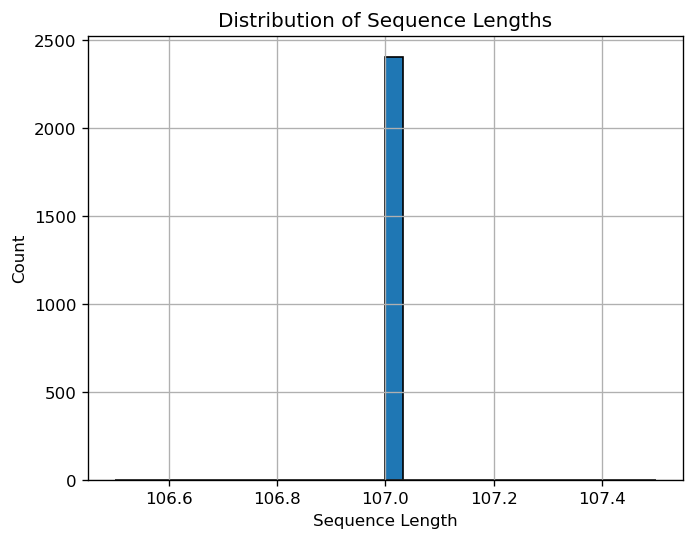

Mean seq_length: 107.0
Median seq_length: 107.0
Min seq_length: 107
Max seq_length: 107


In [3]:
plt.hist(df['seq_length'], bins=30, edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print("Mean seq_length:", df['seq_length'].mean())
print("Median seq_length:", df['seq_length'].median())
print("Min seq_length:", df['seq_length'].min())
print("Max seq_length:", df['seq_length'].max())

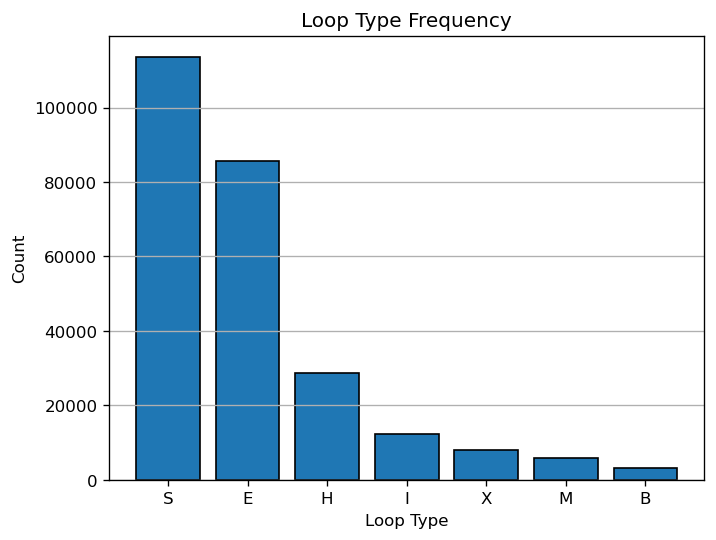

,count
S,113536
E,85634
H,28624
I,12187
X,7959
M,5792
B,3068


In [4]:
# predicted_loop_type is a string with one character per nucleotide. Let's aggregate frequencies.
all_loop_chars = ''.join(df['predicted_loop_type'].values)
loop_types = list(all_loop_chars)

loop_counts = pd.Series(loop_types).value_counts()

plt.bar(loop_counts.index, loop_counts.values, edgecolor='black')
plt.title('Loop Type Frequency')
plt.xlabel('Loop Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

display(loop_counts.to_frame('count'))

In [6]:
def parse_structure(structure):
    stack = []
    pairs = []
    for i, ch in enumerate(structure):
        if ch == '(':
            stack.append(i)
        elif ch == ')':
            j = stack.pop()
            pairs.append((i,j))
    return pairs

# Build graphs for all samples and compute stats
num_nodes_list = []
num_edges_list = []
degree_list = []

for i, row in df.iterrows():
    seq_length = row['seq_length']
    structure = row['structure']
    pairs = parse_structure(structure)

    # Create graph with nodes = nucleotides, edges = pairs
    G = nx.Graph()
    G.add_nodes_from(range(seq_length))
    for (p,q) in pairs:
        G.add_edge(p,q)

    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    # Degree statistics
    degrees = [d for _, d in G.degree()]
    if len(degrees) > 0:
        avg_degree = np.mean(degrees)
        median_degree = np.median(degrees)
    else:
        avg_degree = 0
        median_degree = 0

    num_nodes_list.append(num_nodes)
    num_edges_list.append(num_edges)
    degree_list.append(degrees)

df['num_edges'] = num_edges_list
df['avg_degree'] = [np.mean(d) if len(d)>0 else 0 for d in degree_list]
df['median_degree'] = [np.median(d) if len(d)>0 else 0 for d in degree_list]

In [7]:
print("Overall Graph Statistics:")
print("Mean number of edges:", df['num_edges'].mean())
print("Median number of edges:", df['num_edges'].median())

print("Mean avg_degree:", df['avg_degree'].mean())
print("Median avg_degree:", df['avg_degree'].median())

print("Mean median_degree:", df['median_degree'].mean())
print("Median median_degree:", df['median_degree'].median())

display(df[['num_edges', 'avg_degree', 'median_degree']].describe())

Overall Graph Statistics:
Mean number of edges: 23.653333333333332
Median number of edges: 26.0
Mean avg_degree: 0.4421183800623052
Median avg_degree: 0.48598130841121495
Mean median_degree: 0.43916666666666665
Median median_degree: 0.0


,num_edges,avg_degree,median_degree
count,2400.000000,2400.000000,2400.000000
mean,23.653333,0.442118,0.439167
std,7.975723,0.149079,0.496389
min,7.000000,0.130841,0.000000
25%,20.750000,0.387850,0.000000
50%,26.000000,0.485981,0.000000
75%,29.000000,0.542056,1.000000
max,38.000000,0.710280,1.000000


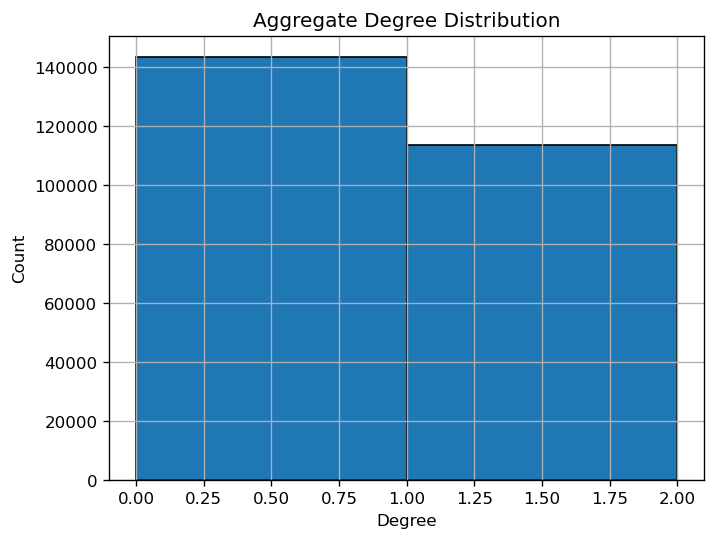

Aggregate Degree Stats:
Mean degree: 0.4421183800623053
Median degree: 0.0
Max degree: 1


In [8]:
all_degrees = [deg for dlist in degree_list for deg in dlist]

plt.hist(all_degrees, bins=range(0,max(all_degrees)+2), edgecolor='black')
plt.title('Aggregate Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print("Aggregate Degree Stats:")
print("Mean degree:", np.mean(all_degrees))
print("Median degree:", np.median(all_degrees))
print("Max degree:", max(all_degrees))

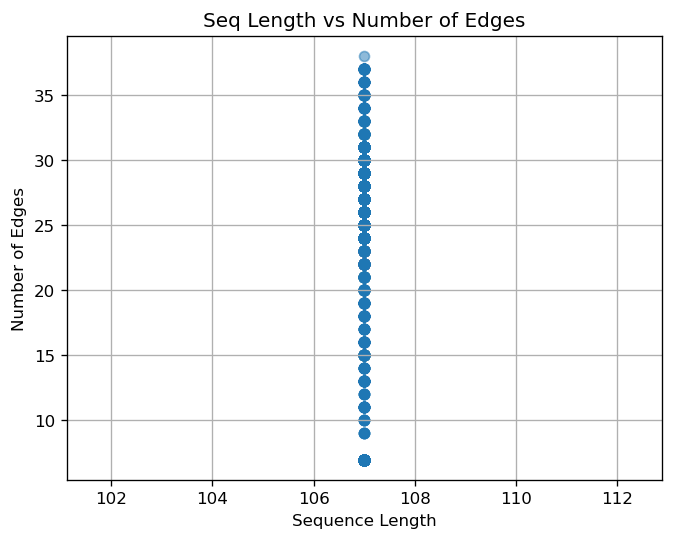

Correlation between seq_length and num_edges: nan


In [9]:
plt.scatter(df['seq_length'], df['num_edges'], alpha=0.5)
plt.title('Seq Length vs Number of Edges')
plt.xlabel('Sequence Length')
plt.ylabel('Number of Edges')
plt.grid(True)
plt.show()

correlation = df[['seq_length','num_edges']].corr().loc['seq_length','num_edges']
print("Correlation between seq_length and num_edges:", correlation)

In [11]:
loop_characters = ['E','S','H','I','M','B','X']

# Count occurrences of each loop type character per sequence
def loop_presence_count(loop_str, char):
    return loop_str.count(char)

for char in loop_characters:
    df[f'count_{char}'] = df['predicted_loop_type'].apply(lambda x: loop_presence_count(x, char))

print("Average degree by count of each loop character (binned):")
for char in loop_characters:
    # Choose bins adaptively based on the data distribution
    max_count = df[f'count_{char}'].max()
    # Create bins: start at -1 for no occurrences, then small increments up to max_count
    # We can choose a heuristic, for example:
    bins = [-1,0]  # no occurrences
    if max_count > 0:
        # add bins dynamically
        # e.g. if max_count is large, we add a few bins at intervals
        # We'll try a simple approach: 
        step = max(1, max_count // 5)  # divide into 5 bins
        current = 0
        while current < max_count:
            current += step
            bins.append(current)
        # ensure last bin covers all
        if bins[-1] < max_count:
            bins[-1] = max_count

    summary = df.groupby(pd.cut(df[f'count_{char}'], bins=bins))['avg_degree'].mean()

    print(f"\nLoop character '{char}':")
    display(summary)

Average degree by count of each loop character (binned):

Loop character 'E':


/var/folders/y1/d585jsl14mx_plx_37lzbhzh0000gn/T/ipykernel_11201/1077839934.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(pd.cut(df[f'count_{char}'], bins=bins))['avg_degree'].mean()


count_E
(-1, 0]           NaN
(0, 17]           NaN
(17, 34]     0.495270
(34, 51]     0.368833
(51, 68]     0.243881
(68, 85]     0.193925
(85, 102]    0.130841
Name: avg_degree, dtype: float64


Loop character 'S':


count_S
(-1, 0]          NaN
(0, 15]     0.130841
(15, 30]    0.251272
(30, 45]    0.373313
(45, 60]    0.499599
(60, 75]    0.617020
(75, 90]    0.710280
Name: avg_degree, dtype: float64


Loop character 'H':


count_H
(-1, 0]          NaN
(0, 11]     0.426168
(11, 22]    0.466943
(22, 33]    0.391391
(33, 44]    0.306854
(44, 55]    0.257944
Name: avg_degree, dtype: float64


Loop character 'I':


count_I
(-1, 0]     0.401797
(0, 8]      0.478879
(8, 16]     0.477389
(16, 24]    0.441092
(24, 32]    0.391188
(32, 40]    0.340187
(40, 48]    0.280374
Name: avg_degree, dtype: float64


Loop character 'M':


count_M
(-1, 0]     0.427197
(0, 7]      0.508938
(7, 14]     0.455662
(14, 21]    0.424988
(21, 28]    0.369159
(28, 35]    0.281018
(35, 42]    0.299065
Name: avg_degree, dtype: float64


Loop character 'B':


count_B
(-1, 0]     0.410329
(0, 3]      0.485390
(3, 6]      0.522118
(6, 9]      0.527150
(9, 12]     0.498290
(12, 15]    0.401150
(15, 18]    0.411215
(18, 21]    0.429907
Name: avg_degree, dtype: float64


Loop character 'X':


count_X
(-1, 0]     0.414531
(0, 10]     0.495191
(10, 20]    0.364272
(20, 30]    0.311810
(30, 40]    0.283347
(40, 50]    0.213618
(50, 60]    0.182243
Name: avg_degree, dtype: float64